In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

from sklearn.utils import shuffle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data

import sys
HOME = "/home/isai/Documents/github/mount_super_computer/siamese"
sys.path.append(HOME + '/My_Dataset')
from my_dataset import load_my_dataset


In [12]:
BATCH_SIZE = 4
TEST_LOOPS = 30
NUMBER_OF_IMAGES = 300

data = load_my_dataset(HOME + '/My_Dataset/image_directory_list.txt', NUMBER_OF_IMAGES)

accuracies = []

number of files 300
Features shape= (250, 250, 1) Labels shape= ()


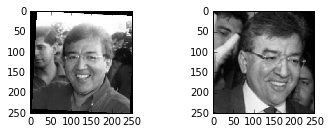

Same Person?[ True]	Prediction=[ True]


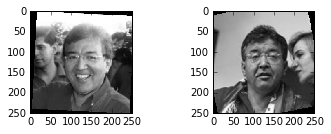

Same Person?[ True]	Prediction=[ True]


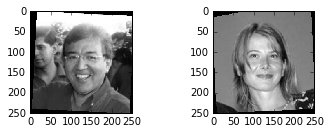

Same Person?[False]	Prediction=[ True]


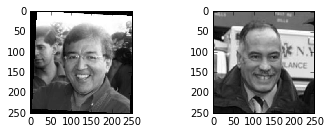

Same Person?[False]	Prediction=[False]




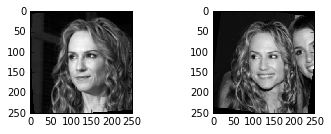

Same Person?[ True]	Prediction=[ True]


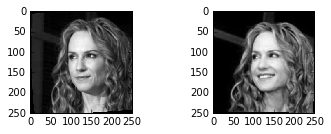

Same Person?[ True]	Prediction=[ True]


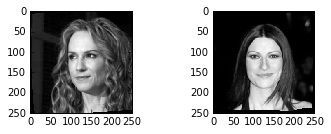

Same Person?[False]	Prediction=[False]


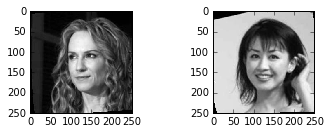

Same Person?[False]	Prediction=[False]




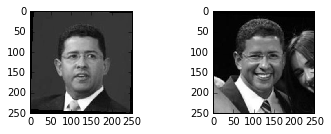

Same Person?[ True]	Prediction=[False]


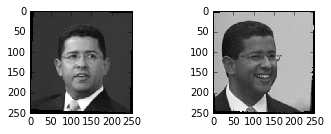

Same Person?[ True]	Prediction=[ True]


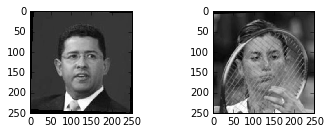

Same Person?[False]	Prediction=[ True]


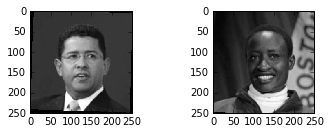

Same Person?[False]	Prediction=[False]




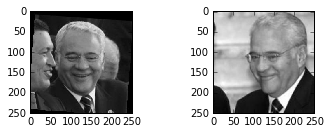

Same Person?[ True]	Prediction=[ True]


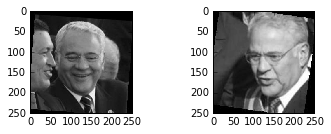

Same Person?[ True]	Prediction=[ True]


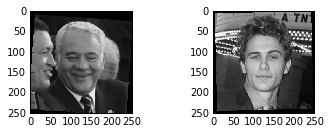

Same Person?[False]	Prediction=[False]


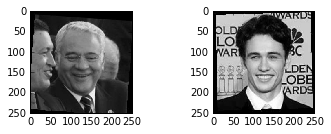

Same Person?[False]	Prediction=[False]




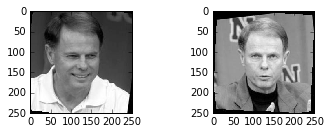

Same Person?[ True]	Prediction=[ True]


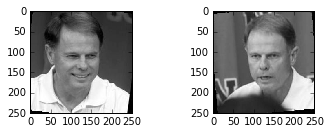

Same Person?[ True]	Prediction=[ True]


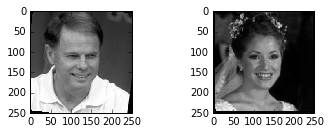

Same Person?[False]	Prediction=[False]


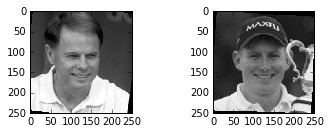

Same Person?[False]	Prediction=[False]




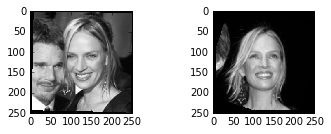

Same Person?[ True]	Prediction=[False]


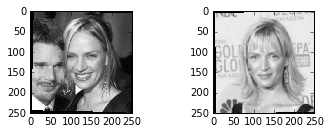

Same Person?[ True]	Prediction=[ True]


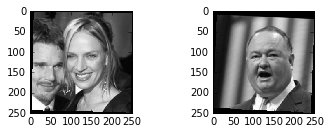

Same Person?[False]	Prediction=[False]


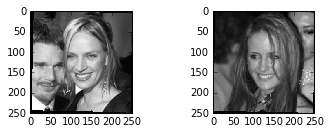

Same Person?[False]	Prediction=[False]




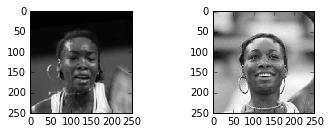

Same Person?[ True]	Prediction=[False]


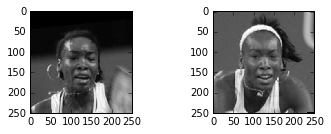

Same Person?[ True]	Prediction=[False]


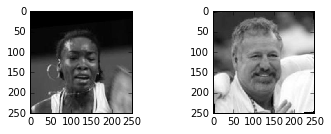

Same Person?[False]	Prediction=[False]


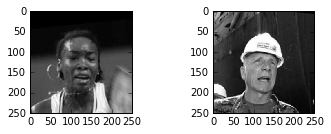

Same Person?[False]	Prediction=[False]




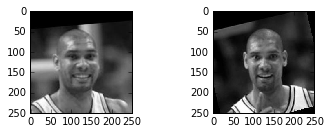

Same Person?[ True]	Prediction=[ True]


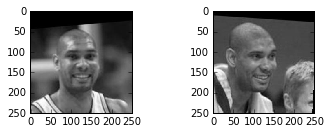

Same Person?[ True]	Prediction=[ True]


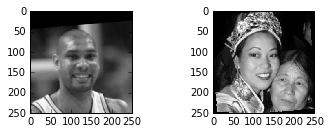

Same Person?[False]	Prediction=[False]


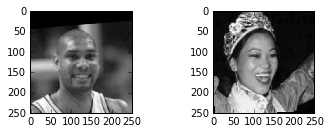

Same Person?[False]	Prediction=[False]




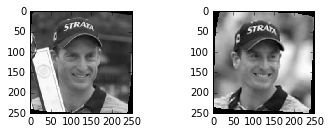

Same Person?[ True]	Prediction=[ True]


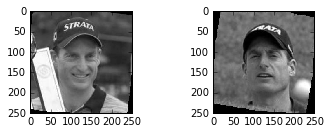

Same Person?[ True]	Prediction=[ True]


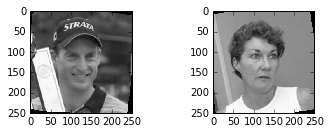

Same Person?[False]	Prediction=[False]


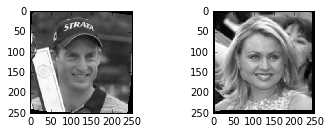

Same Person?[False]	Prediction=[False]




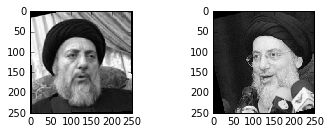

Same Person?[ True]	Prediction=[ True]


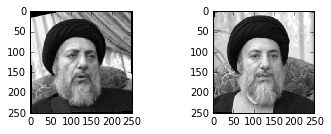

Same Person?[ True]	Prediction=[ True]


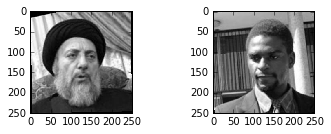

Same Person?[False]	Prediction=[False]


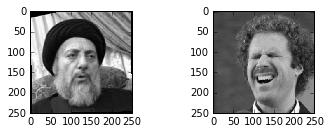

Same Person?[False]	Prediction=[False]




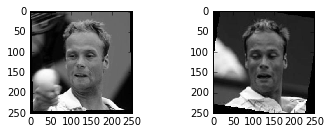

Same Person?[ True]	Prediction=[False]


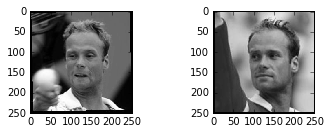

Same Person?[ True]	Prediction=[ True]


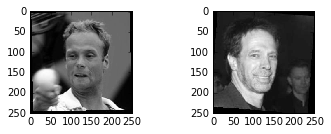

Same Person?[False]	Prediction=[False]


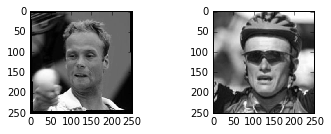

Same Person?[False]	Prediction=[False]




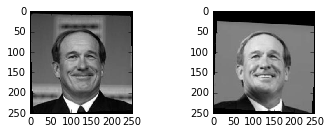

Same Person?[ True]	Prediction=[ True]


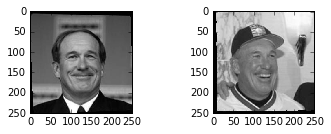

Same Person?[ True]	Prediction=[ True]


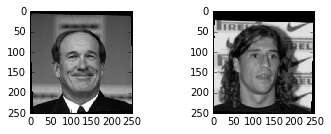

Same Person?[False]	Prediction=[False]


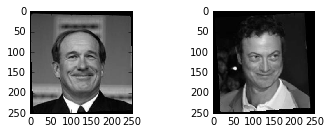

Same Person?[False]	Prediction=[False]




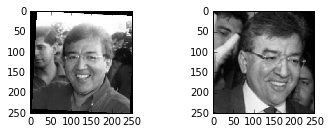

Same Person?[ True]	Prediction=[ True]


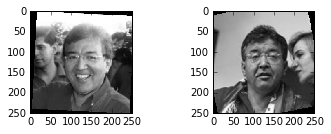

Same Person?[ True]	Prediction=[ True]


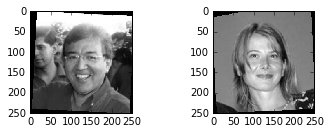

Same Person?[False]	Prediction=[ True]


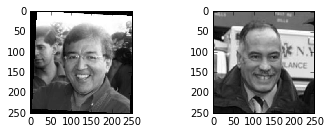

Same Person?[False]	Prediction=[False]




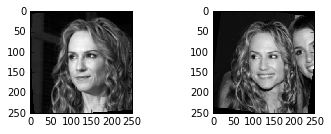

Same Person?[ True]	Prediction=[ True]


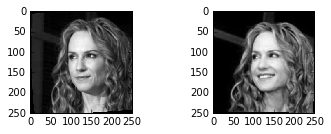

Same Person?[ True]	Prediction=[ True]


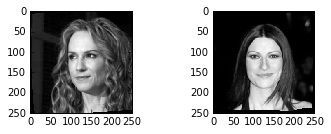

Same Person?[False]	Prediction=[False]


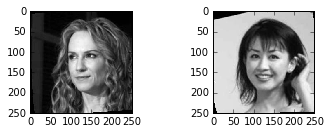

Same Person?[False]	Prediction=[False]




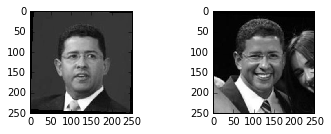

Same Person?[ True]	Prediction=[False]


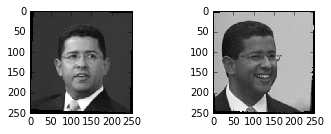

Same Person?[ True]	Prediction=[ True]


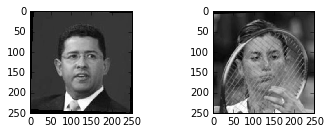

Same Person?[False]	Prediction=[ True]


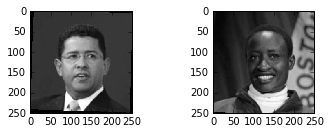

Same Person?[False]	Prediction=[False]




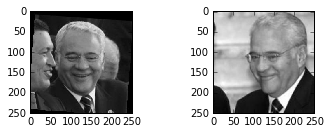

Same Person?[ True]	Prediction=[ True]


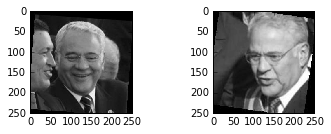

Same Person?[ True]	Prediction=[ True]


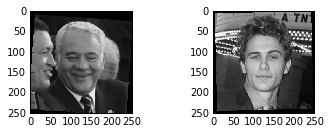

Same Person?[False]	Prediction=[False]


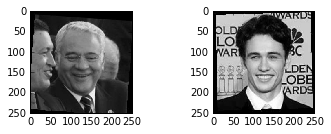

Same Person?[False]	Prediction=[False]




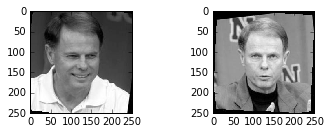

Same Person?[ True]	Prediction=[ True]


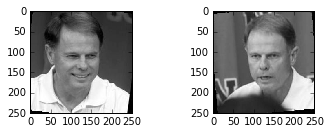

Same Person?[ True]	Prediction=[ True]


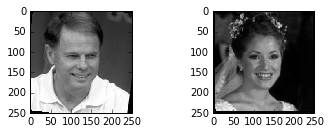

Same Person?[False]	Prediction=[False]


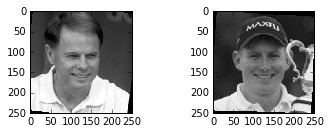

Same Person?[False]	Prediction=[False]




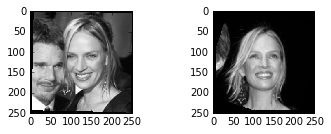

Same Person?[ True]	Prediction=[False]


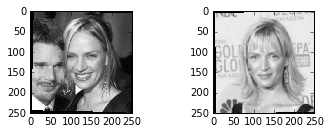

Same Person?[ True]	Prediction=[ True]


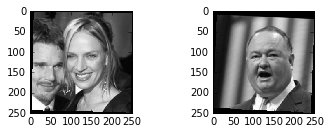

Same Person?[False]	Prediction=[False]


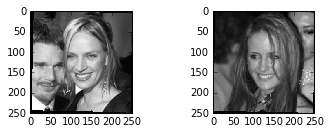

Same Person?[False]	Prediction=[False]




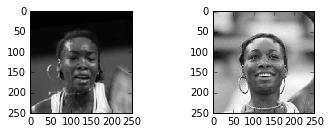

Same Person?[ True]	Prediction=[False]


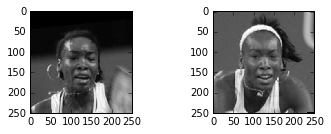

Same Person?[ True]	Prediction=[False]


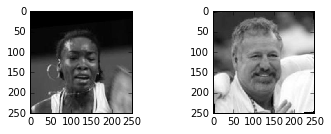

Same Person?[False]	Prediction=[False]


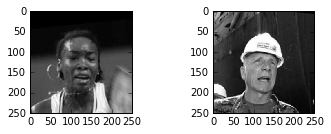

Same Person?[False]	Prediction=[False]




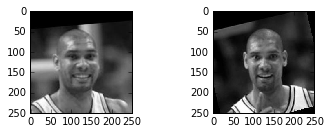

Same Person?[ True]	Prediction=[ True]


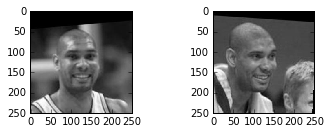

Same Person?[ True]	Prediction=[ True]


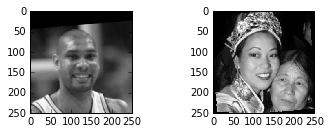

Same Person?[False]	Prediction=[False]


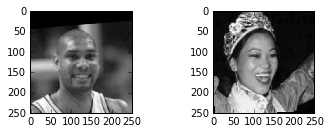

Same Person?[False]	Prediction=[False]




In [19]:
trained_graph_path = "./Trained_Model/faces_trained_graph.pb"

with tf.Graph().as_default() as this_graph:
    trained_graph = tf.GraphDef()
    with open(trained_graph_path, "rb") as f:
        trained_graph.ParseFromString(f.read())
        tf.import_graph_def(trained_graph, name="")

    with tf.Session() as sess:
        
        images_left = sess.graph.get_tensor_by_name("inputs_section/images_left:0")
        images_right = sess.graph.get_tensor_by_name("inputs_section/images_right:0")
        output_node = sess.graph.get_tensor_by_name("computation_section/output_node:0")
        
        for i in range(TEST_LOOPS):
            x1, x2, y = data.train.get_next_siamese_batch(BATCH_SIZE) 

            predictions = sess.run(output_node, feed_dict={images_left:x1, images_right:x2})
            
            accuracies.append((y == predictions).astype(float))
            
            for j in range(BATCH_SIZE):
                plt.figure(1)
                plt.subplot(221)
                plt.imshow(x1[j].squeeze(), interpolation='nearest', cmap=matplotlib.cm.gray)

                plt.subplot(222)
                plt.imshow(x2[j].squeeze(), interpolation='nearest', cmap=matplotlib.cm.gray)
                plt.show()

                print("Same Person?" + str(y[j].astype(bool)) + "\tPrediction=" + str(predictions[j]))
                
            print("\n")
                

            
        

In [20]:
accuracy = np.mean(accuracies)
print("Accuracy= " + str(accuracy))

Accuracy= 0.845679012346
